# Analysis for Doordash using Python

In [1]:
# import packages
import pandas as pd
import numpy as np
import datetime
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# function: getDuration(date1, date2)
# def: return the duration time between the customer placed order and the order was delivered to customer
def getDuration(date1, date2):
    array1 = []
    array2 = []
    datetuples = zip(date1, date2)
    for x,y in datetuples:
        array1.append(dt.strptime(x, '%d %H:%M:%S'))
        array2.append(dt.strptime(y, '%d %H:%M:%S'))
    duration = [y-x for x,y in zip(array1, array2)]
    return duration

In [3]:
# read csv file
fileName = 'data-source/Sample deliveries data - 1 month.csv'
df = pd.read_csv(fileName)

In [4]:
# add a column to calculate the duration between customer placed order and delivered to customer
df["Total Duration"] = getDuration(df.loc[:,"Customer placed order datetime"],df.loc[:,"Delivered to consumer datetime"])

In [5]:
# display the data as table
display(df)

,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Delivery Region,Is ASAP,Order total,Amount of discount,Amount of tip,Refunded amount,Total Duration
0,01 02:52:12,01 03:00:25,01 03:08:09,01 03:35:20,279,50,6738,Mountain View,True,16.33,0.0,0.82,0.0,0 days 00:43:08
1,13 15:58:57,13 17:56:45,13 18:24:39,13 18:57:01,303,96,64746,Palo Alto,True,76.14,0.0,6.45,0.0,0 days 02:58:04
2,17 19:02:37,17 19:12:51,17 19:19:59,17 19:31:09,212,190,12484,San Jose,True,16.77,6.0,2.52,0.0,0 days 00:28:32
3,12 04:01:57,12 04:08:18,12 04:13:02,12 04:37:57,352,194,13920,San Jose,True,25.03,0.0,5.00,0.0,0 days 00:36:00
4,08 23:46:38,08 23:49:32,08 23:54:29,09 00:37:15,313,9,7037,Palo Alto,True,51.57,0.0,5.16,0.0,0 days 00:50:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18073,30 04:28:10,30 04:29:52,NaN,30 04:58:44,287,44,46332,Mountain View,True,44.99,0.0,6.00,0.0,0 days 00:30:34
18074,30 18:33:19,30 18:50:06,30 19:08:19,30 19:20:41,184,44,11055,Mountain View,True,35.80,0.0,5.00,0.0,0 days 00:47:22
18075,30 17:40:02,30 18:06:01,30 18:22:25,30 18:40:20,232,330,24289,San Jose,False,29.33,0.0,1.07,0.0,0 days 01:00:18
18076,30 18:25:36,30 18:34:26,30 19:21:52,30 19:45:36,399,353,2643,Palo Alto,True,123.69,0.0,5.13,0.0,0 days 01:20:00


In [6]:
# get the statistic data of "Total Duration","Order total", "Amount of discount","Amount of tip","Refunded amount"
# observations:
# mean and min of "Total Duration" looks odd
# outlier 4 day 6 hour 2 min 27 sec, total delivery duration
# median delivery duration time is 48 min 15 sec for all the delivery regions.
pd.DataFrame(df[["Total Duration","Order total", "Amount of discount","Amount of tip","Refunded amount"]].describe())

,Total Duration,Order total,Amount of discount,Amount of tip,Refunded amount
count,18078,18078.000000,18078.000000,18078.000000,18078.000000
mean,-1 days +23:05:46.604491648,51.261496,1.356706,3.492022,0.612091
std,1 days 16:51:27.895913228,50.599675,6.516667,3.700115,6.073104
min,-31 days +00:25:11,0.000000,0.000000,0.000000,0.000000
25%,0 days 00:37:11,26.660000,0.000000,1.400000,0.000000
50%,0 days 00:48:15,38.630000,0.000000,2.550000,0.000000
75%,0 days 01:05:30.750000,57.885000,0.000000,4.460000,0.000000
max,4 days 06:02:27,1604.130000,187.880000,120.300000,414.770000


In [7]:
# find why the mean and min are negative
display(df[df["Total Duration"].dt.days < 0].head(5))

# Conclusion: It turns out there are 55 rows that the date of "Delivered to consumer" is reset to a new month. In other words,
# the day of "Delivered to consumer datetime" is less than the day of "Customer placed order datetime"

,Customer placed order datetime,Placed order with restaurant datetime,Driver at restaurant datetime,Delivered to consumer datetime,Driver ID,Restaurant ID,Consumer ID,Delivery Region,Is ASAP,Order total,Amount of discount,Amount of tip,Refunded amount,Total Duration
144,31 16:59:17,02 18:22:29,NaN,02 19:34:56,267,205,476,Palo Alto,False,141.68,0.0,11.92,0.0,-29 days +02:35:39
147,31 23:59:56,01 18:12:54,01 18:15:03,01 18:42:18,99,12,3000,Palo Alto,False,85.60,0.0,7.32,0.0,-31 days +18:42:22
1168,31 23:58:34,01 00:00:51,01 00:10:59,01 00:46:20,288,232,10868,Palo Alto,True,37.48,0.0,1.87,0.0,-31 days +00:47:46
1211,31 23:16:21,31 23:36:27,01 00:01:37,01 00:19:36,248,243,8395,Mountain View,False,63.37,0.0,6.34,0.0,-31 days +01:03:15
1269,31 23:58:42,01 00:30:11,01 01:08:55,01 01:16:24,228,313,51086,San Jose,False,38.52,0.0,1.93,0.0,-31 days +01:17:42


In [8]:
# find the outlier (max)
idNum = df["Total Duration"].idxmax()
pd.DataFrame(df.iloc[idNum,:])
# Conclusion: it turns out that this is a scheduled delivery that placed by the customer, IS_ASAP = false

,8178
Customer placed order datetime,04 18:02:27
Placed order with restaurant datetime,07 18:04:33
Driver at restaurant datetime,08 23:50:08
Delivered to consumer datetime,09 00:04:54
Driver ID,286
Restaurant ID,19
Consumer ID,1934
Delivery Region,Palo Alto
Is ASAP,False
Order total,370.66


In [9]:
# function: convertToMinute(arr)
# def:convert total duration to minutes
def convertToHours(arr):
    return [hr.total_seconds()/3600 for hr in arr]

In [10]:
hrs = convertToHours(df["Total Duration"])

In [11]:
view = df[["Total Duration", "Is ASAP", "Delivery Region","Order total"]]
display(view)

,Total Duration,Is ASAP,Delivery Region,Order total
0,0 days 00:43:08,True,Mountain View,16.33
1,0 days 02:58:04,True,Palo Alto,76.14
2,0 days 00:28:32,True,San Jose,16.77
3,0 days 00:36:00,True,San Jose,25.03
4,0 days 00:50:37,True,Palo Alto,51.57
...,...,...,...,...
18073,0 days 00:30:34,True,Mountain View,44.99
18074,0 days 00:47:22,True,Mountain View,35.80
18075,0 days 01:00:18,False,San Jose,29.33
18076,0 days 01:20:00,True,Palo Alto,123.69


In [12]:
# create a view where eliminating the negative total duration
view["Total Duration"] = hrs
view = view[view["Total Duration"] >= 0]

C:\Users\cavinlauw\AppData\Local\Temp\ipykernel_7508\2663638699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  view["Total Duration"] = hrs


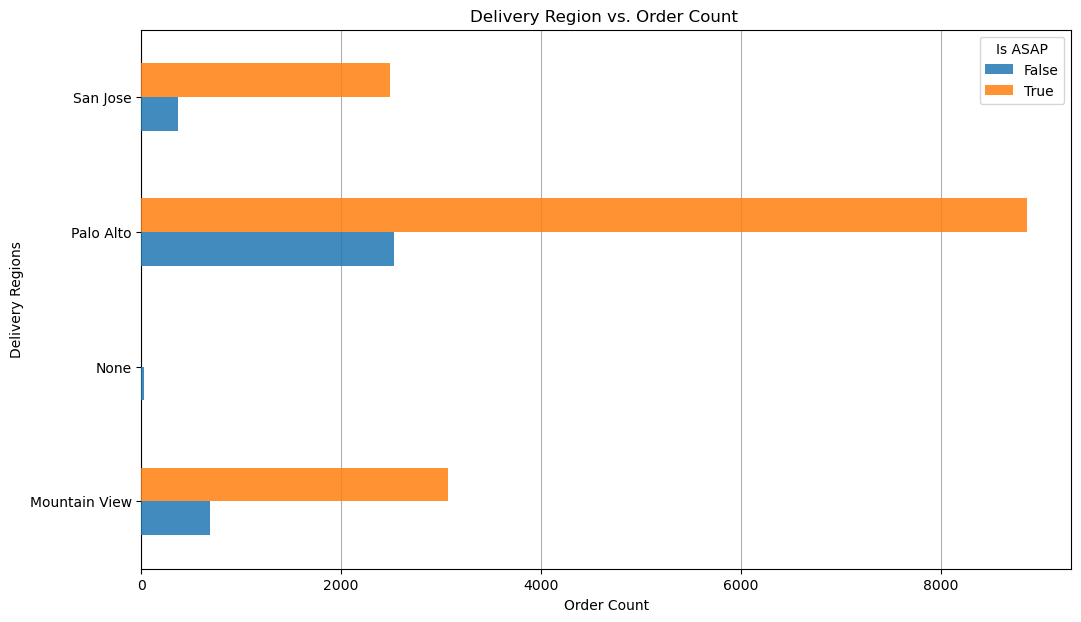

In [13]:
# create a horizontal bar graph to show the number of order based on Delivery Regions and Is ASAP(true, false)
g1 = view.pivot_table(values='Total Duration', index = 'Delivery Region', columns= 'Is ASAP', aggfunc= 'count')
g1.plot(kind="barh",figsize=(12,7), width=.5, zorder=3, alpha=.85)
plt.title("Delivery Region vs. Order Count ")
plt.ylabel("Delivery Regions")
plt.xlabel("Order Count")
plt.grid(axis="x",zorder=0)
plt.show()

In [14]:
asapOnly = df[(df["Is ASAP"] == True)]
asapOnly["Total Duration"] = convertToHours(asapOnly["Total Duration"])

C:\Users\cavinlauw\AppData\Local\Temp\ipykernel_7508\2062630770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asapOnly["Total Duration"] = convertToHours(asapOnly["Total Duration"])


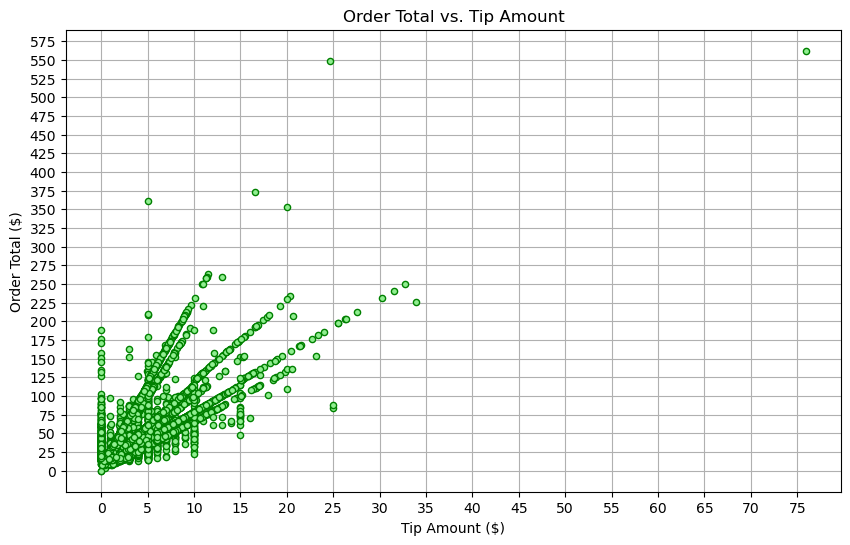

In [15]:
asapOnly = asapOnly[(asapOnly["Total Duration"] >= 0) & (asapOnly["Total Duration"] < 4)]

plt.figure(figsize=(10,6))

plt.grid(zorder=0)
plt.xticks(np.arange(0,80,5))
plt.yticks(np.arange(0,600,25))
plt.scatter(y=asapOnly["Order total"], x=asapOnly["Amount of tip"], s= 20,zorder=3,edgecolor="green", color="lightgreen")
plt.title("Order Total vs. Tip Amount")
plt.xlabel("Tip Amount ($)")
plt.ylabel("Order Total ($)")

plt.show()

In [16]:
#Customer: find the top 10 frequent customer by Order Amount
customer_freq = df.pivot_table(values='Order total', index = 'Consumer ID', aggfunc= 'sum')\
.sort_values(by = ['Order total'], ascending = False, axis = 0).head(10)
display(customer_freq)

,Order total
Consumer ID,
929,9966.41
8076,7387.37
3392,5428.39
514,5262.26
550,4020.02
6245,3457.86
5673,3395.66
14043,3375.82
10294,3354.84


<AxesSubplot:xlabel='Consumer ID'>

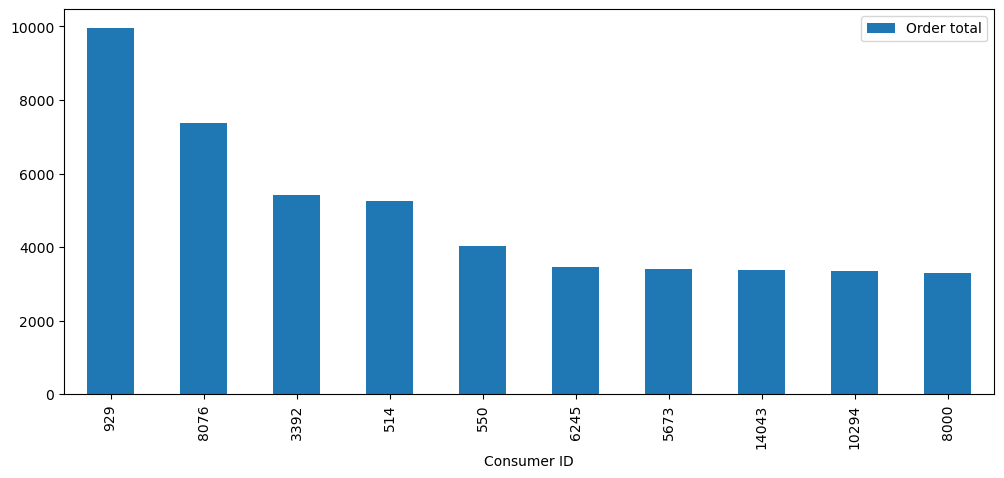

In [17]:
customer_freq.plot(kind='bar',figsize=(12,5))

In [18]:
# restaurant: find the 10 highest sales restaurant and location
restaurant_sales = df.pivot_table(values='Order total', index = 'Restaurant ID', aggfunc= 'sum')\
.sort_values(by = ['Order total'], ascending = False, axis = 0).head(10)
display(restaurant_sales)

,Order total
Restaurant ID,
9,39374.93
8,38386.19
20,32838.35
63,32730.28
107,26310.39
10,21837.70
68,19385.62
12,15421.88
76,15376.71


<AxesSubplot:xlabel='Restaurant ID'>

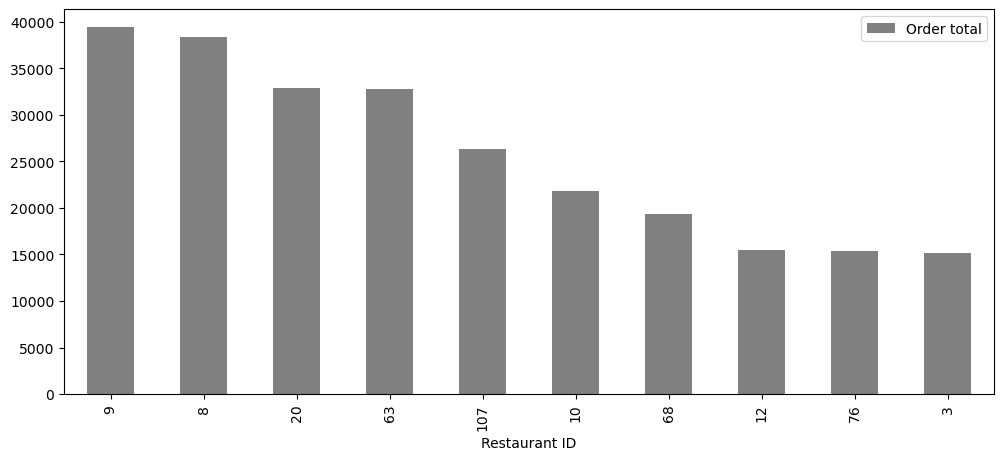

In [19]:
restaurant_sales.plot(kind='bar',figsize=(12,5), color='gray')

In [20]:
location_sales = df.pivot_table(values='Order total', index = 'Delivery Region', aggfunc= 'sum')\
.sort_values(by = ['Order total'], ascending = False, axis = 0).head(10)
display(location_sales)

,Order total
Delivery Region,
Palo Alto,600034.18
Mountain View,195792.37
San Jose,125045.32
None,5833.46


([<matplotlib.patches.Wedge at 0x25b9fcf6640>,
 [Text(-0.49165154151350776, 0.9840115658504182, 'Palo Alto'),
  Text(0.021637765567095686, -1.0997871644555886, 'Mountain View'),
  Text(0.9839605804090534, -0.4917535726368229, 'San Jose'),
  Text(1.0997849183882131, -0.021751627199630513, 'None')],
 [Text(-0.2681735680982769, 0.5367335813729552, '64.7%'),
  Text(0.01180241758205219, -0.5998839078848663, '21.1%'),
  Text(0.5367057711322109, -0.268229221438267, '13.5%'),
  Text(0.599882682757207, -0.011864523927071187, '0.6%')])

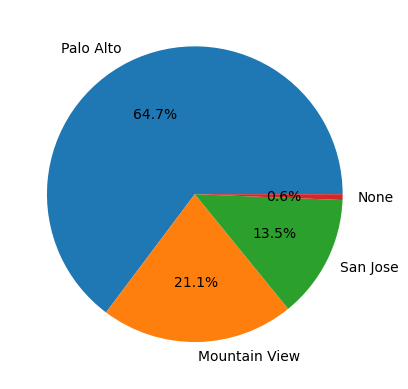

In [21]:
fig, ax = plt.subplots()
ax.pie(location_sales.stack(), labels=["{0}".format(l1, l2) for l1, l2 in location_sales.stack().index], autopct='%1.1f%%')

In [22]:
# Driver: find top 10 most tip earner as a driver
driver_tips = df.pivot_table(values='Amount of tip', index = 'Driver ID', aggfunc= 'sum')\
.sort_values(by = ['Amount of tip'], ascending = False, axis = 0).head(10)
display(driver_tips)

,Amount of tip
Driver ID,
195,1188.96
248,1179.22
267,1011.21
216,922.23
343,891.49
48,838.22
60,833.57
259,811.11
222,809.78


<AxesSubplot:xlabel='Driver ID'>

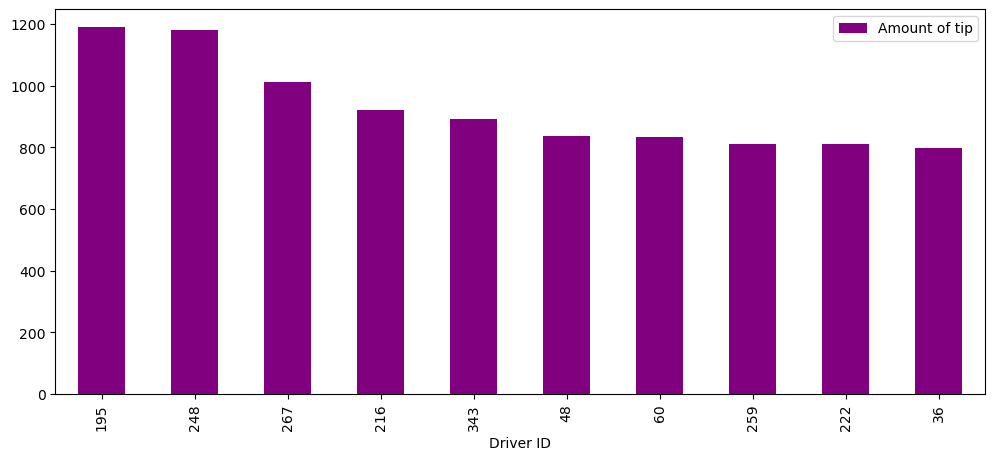

In [23]:
driver_tips.plot(kind='bar',figsize=(12,5), color='purple')